In [ ]:
effdet_no = 2
try :
    effdet_no = int(input("What efficientdet do you want to train? (0/1/2/3/4/5/6/7) \n"))
except :
    effdet_no = 2
if effdet_no>7 :
    effdet_no = 2
print("Training Effdet",effdet_no)

What efficientdet do you want to train? (0/1/2/3/4/5/6/7) 
5
Training Effdet 5


In [ ]:
!pip3 install torch==1.4.0 torchvision==0.5.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 38.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!nvidia-smi

Tue Nov 10 18:18:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
print(torch.__version__) 
torch.cuda.is_available()

1.4.0


True

In [ ]:
! git clone https://github.com/NVIDIA/apex
os.chdir('apex')
! pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
os.chdir('../')

Cloning into 'apex'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 7456 (delta 0), reused 0 (delta 0), pack-reused 7455
Receiving objects: 100% (7456/7456), 13.91 MiB | 26.57 MiB/s, done.
Resolving deltas: 100% (5038/5038), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-ngshmukq
Created temporary directory: /tmp/pip-req-tracker-hgt1eaog
Created requirements tracker '/tmp/pip-req-tracker-hgt1eaog'
Created temporary directory: /tmp/pip-install-1qbnyfyj
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-7kv_dz42
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-hgt1eaog'
    Running setup.py (path:/tmp/pip-req-build-7kv_dz42/setup.py) egg_info 

In [ ]:
#!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 5.7MB/s 
     |████████████████████████████████| 952kB 17.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=dfb1636277c5919b0c303f7bf925f6dbb92ec7d642498a18457ee77f3a881269
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import albumentations as A
from apex import amp
from albumentations.pytorch.transforms import ToTensorV2
import albumentations as A
from albumentations.augmentations.transforms import RandomRain, RandomSnow, RandomFog
from albumentations.pytorch.transforms import ToTensorV2

In [ ]:
import sys
#sys.path.insert(0, "/content/timm_efficientdet_pytorch")
#sys.path.insert(0, "/content/omegaconf")
#sys.path.insert(0, "/content/weightedboxesfusion")

import os
from datetime import datetime
import time
import random
import cv2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

from glob import glob
from skimage import io


np.random.seed(5)

In [ ]:
TRAIN_ROOT_PATH = '/content/drive/My Drive/Dhaka-AI 2020/dataset/train/'
IMG_SIZE = 512

In [ ]:
train_image_path = '/content/drive/My Drive/Dhaka-AI 2020/dataset/train/'
test_image_path = '/content/drive/My Drive/Dhaka-AI 2020/dataset/test/'

types = ('*.jpg','*.jpeg','*.png','*.JPG','*.PNG') # the tuple of file types
train_images = []
for type in types:
  train_images.extend(sorted(glob(train_image_path + type)))
test_images = sorted(glob(test_image_path + '*'))
train_xml = sorted(glob(train_image_path + '*.xml'))


In [ ]:
print(f' train images : {len(train_images)} items')
print(f' test images : {len(test_images)} items')
print(f' train images : {len(train_xml)} items')

 train images : 3000 items
 test images : 500 items
 train images : 3003 items


In [ ]:
from random import sample

def get_ids(path_list):
  path_list = random.sample(path_list,len(path_list))
  id_list = [path.split('/')[-1].split('.')[0] for path in path_list]
  return np.array(id_list)

train_ids = get_ids(train_images)
valid_ids = get_ids(test_images)

len(train_ids)
print(train_ids)

['Pias (397)' 'Navid_43' 'Dipto_611' ... 'Numan_(433)' 'Pias (407)'
 'Dipto_ 150']


In [ ]:
from sklearn import preprocessing
#getting the labels
marking_train = pd.read_csv('/content/drive/My Drive/Dhaka-AI 2020/dataset/train.csv')

#A new Label dataframe storing width and height
wh_train = marking_train
wh_train['w'] = marking_train['xmax'] - marking_train['xmin']
wh_train['h'] = marking_train['ymax'] - marking_train['ymin']
wh_train = wh_train.drop(['xmax','ymax'], axis = 1)

wh_train = wh_train.rename(columns={"class" : "classname","width": "image_width", "height": "image_height", "xmin": "x", "ymin": "y"})
marking_train = wh_train
marking_train['image_id'] = marking_train['image_name']
for i in range(0,marking_train['image_name'].size) :
  marking_train['image_id'].iloc[i] = marking_train['image_name'].iloc[i].split('.')[0]
#marking_train = marking_train.drop(['image_name'], axis = 1)
le = preprocessing.LabelEncoder()
targets = le.fit_transform(marking_train['classname'].tolist())
marking_train['class_id'] = targets
marking_train = marking_train[['image_id','image_name','image_width','image_height','classname','class_id','x','y','w','h']]
marking_train = marking_train.drop(['image_name'], axis=1)
marking_train

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,image_id,image_width,image_height,classname,class_id,x,y,w,h
0,01,1200,800,bus,4,833,390,254,410
1,01,1200,800,bus,4,901,284,117,111
2,01,1200,800,bus,4,909,241,101,46
3,01,1200,800,rickshaw,13,761,413,71,127
4,01,1200,800,rickshaw,13,777,364,51,45
...,...,...,...,...,...,...,...,...,...
24363,Pias (99),854,480,car,5,376,285,97,80
24364,Pias (99),854,480,car,5,360,282,42,32
24365,Pias (99),854,480,car,5,442,275,28,26
24366,Pias (99),854,480,three wheelers (CNG),17,486,277,47,58


<a id="2"></a>
#Data Cleaning:
At the time of initial coding, I found some problem with three of the images. They had two categories of problem. 
1. Train image files <font color="red">`Pias (359).PNG` </font> and <font color="red">`Pias (360).PNG` </font> are actually  `JPEG` files but somehow they are named with extention `.PNG`. So the height and width attribute in the corresponding xml labels are 0 as automatic label generator could not read the image properly. 

2. One of the label files <font color="red"> `231.xml` </font> is actually a `.txt` format label but labeled as `.xml` file. However for the inconsistency of the label index in that file, we will simply drop label and image together. 


To avoid the problem, simply we will remove these three problematic files and process rest of them. The following code cell will remove them and their label file.

ref : https://colab.research.google.com/drive/1pi4foPL7Cg0sA7_ri52yu5sd6zjTXU2m?usp=sharing&fbclid=IwAR1KA1-HsEE7qy_iNfMWUHJeROu1XGK4sL4iVi_WegGjd7X_636MARFk5fI#scrollTo=GkWn0aCgJPe0

In [ ]:
corrupt_files = ['231','Pias (359)', 'Pias (360)']

for i in corrupt_files :
  if marking_train[marking_train['image_id'] == i].index.any() :
    print(marking_train[marking_train['image_id'] == i])

         image_id  image_width  image_height  ...    y    w    h
23259  Pias (359)            0             0  ...  241  464  274
23260  Pias (359)            0             0  ...  255  239  205
23261  Pias (359)            0             0  ...  268  392  346
23262  Pias (359)            0             0  ...  241   48   63
23263  Pias (359)            0             0  ...  242   43   60
23264  Pias (359)            0             0  ...  239   41   54
23265  Pias (359)            0             0  ...  238   36   45
23266  Pias (359)            0             0  ...  238   35   40
23267  Pias (359)            0             0  ...  243   31   31
23268  Pias (359)            0             0  ...  236   18   21
23269  Pias (359)            0             0  ...  238   99   34
23270  Pias (359)            0             0  ...  183  177   71
23271  Pias (359)            0             0  ...  201  202   75
23272  Pias (359)            0             0  ...  216   73   52

[14 rows x 9 columns]
  

In [ ]:
corrupt_files = ['231','Pias (359)', 'Pias (360)']

for i in corrupt_files :
  # Get indexes where name column has value i
  if marking_train[marking_train['image_id'] == i].index.any() :
    indexNames = marking_train[marking_train['image_id'] == i].index
    # Delete these row indexes from dataFrame
    marking_train.drop(indexNames , inplace=True)

marking_train

,image_id,image_width,image_height,classname,class_id,x,y,w,h
0,01,1200,800,bus,4,833,390,254,410
1,01,1200,800,bus,4,901,284,117,111
2,01,1200,800,bus,4,909,241,101,46
3,01,1200,800,rickshaw,13,761,413,71,127
4,01,1200,800,rickshaw,13,777,364,51,45
...,...,...,...,...,...,...,...,...,...
24363,Pias (99),854,480,car,5,376,285,97,80
24364,Pias (99),854,480,car,5,360,282,42,32
24365,Pias (99),854,480,car,5,442,275,28,26
24366,Pias (99),854,480,three wheelers (CNG),17,486,277,47,58


In [ ]:
#code for each vehicle
column_values = marking_train[["classname", "class_id"]].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

['bus' 4 'rickshaw' 13 'motorbike' 10 'car' 5 'three wheelers (CNG)' 17
 'pickup' 11 'minivan' 9 'suv' 15 'van' 19 'taxi' 16 'truck' 18 'bicycle'
 3 'policecar' 12 'ambulance' 0 'human hauler' 7 'wheelbarrow' 20
 'minibus' 8 'auto rickshaw' 2 'army vehicle' 1 'scooter' 14 'garbagevan'
 6]


In [ ]:
#total classes
marking_train['class_id'].nunique()

21

In [ ]:
#highest number of objects in one image
marking_train.groupby('image_id').count().sort_values(by='w',ascending=False)

,image_width,image_height,classname,class_id,x,y,w,h
image_id,,,,,,,,
215,122,122,122,122,122,122,122,122
216,113,113,113,113,113,113,113,113
64,111,111,111,111,111,111,111,111
78,98,98,98,98,98,98,98,98
80,95,95,95,95,95,95,95,95
...,...,...,...,...,...,...,...,...
Dipto_625,1,1,1,1,1,1,1,1
Dipto_435,1,1,1,1,1,1,1,1
Dipto_438,1,1,1,1,1,1,1,1


In [ ]:
df = marking_train[(marking_train[['image_width']] != 0).all(axis=1)]
df.sort_values(by='image_width',ascending=True)

#height 268,4158 (min and max)
#width 352,4160

,image_id,image_width,image_height,classname,class_id,x,y,w,h
9406,Dipto_742,352,512,truck,18,70,274,20,25
9415,Dipto_745,352,469,truck,18,118,225,115,132
9416,Dipto_745,352,469,bus,4,80,263,46,48
9417,Dipto_745,352,469,car,5,71,284,10,13
9418,Dipto_746,352,404,rickshaw,13,172,280,25,39
...,...,...,...,...,...,...,...,...,...
7686,Dipto_364,4160,1968,truck,18,1954,858,97,133
7687,Dipto_364,4160,1968,rickshaw,13,2107,1008,55,108
7688,Dipto_364,4160,1968,rickshaw,13,2173,1023,59,103
7690,Dipto_364,4160,1968,rickshaw,13,2123,901,38,60


In [ ]:
df = marking_train

In [ ]:
df['x2'] = df['x'] + df['w'] 
df['y2'] = df['y'] + df['h']

df = df.rename(columns={'x' : 'x1', 'y' : 'y1'})
df = df.drop(columns=['class_id','w','h'])
df

,image_id,image_width,image_height,classname,x1,y1,x2,y2
0,01,1200,800,bus,833,390,1087,800
1,01,1200,800,bus,901,284,1018,395
2,01,1200,800,bus,909,241,1010,287
3,01,1200,800,rickshaw,761,413,832,540
4,01,1200,800,rickshaw,777,364,828,409
...,...,...,...,...,...,...,...,...
24363,Pias (99),854,480,car,376,285,473,365
24364,Pias (99),854,480,car,360,282,402,314
24365,Pias (99),854,480,car,442,275,470,301
24366,Pias (99),854,480,three wheelers (CNG),486,277,533,335


In [ ]:
my_list = ['Pias (309)', 'Numan_(210)', 'Numan_(301)', 'Navid_295','Navid_650', 'Numan_(112)', 'Dipto_ 117', 'Dipto_752']

In [ ]:
# for i in my_list :
#   df.drop(df.loc[df['image_id']==i].index, inplace=True)

In [ ]:
df

,image_id,image_width,image_height,classname,x1,y1,x2,y2
0,01,1200,800,bus,833,390,1087,800
1,01,1200,800,bus,901,284,1018,395
2,01,1200,800,bus,909,241,1010,287
3,01,1200,800,rickshaw,761,413,832,540
4,01,1200,800,rickshaw,777,364,828,409
...,...,...,...,...,...,...,...,...
24363,Pias (99),854,480,car,376,285,473,365
24364,Pias (99),854,480,car,360,282,402,314
24365,Pias (99),854,480,car,442,275,470,301
24366,Pias (99),854,480,three wheelers (CNG),486,277,533,335


In [ ]:
class_map = dict(zip(df['classname'].unique(),list(range(1,22))))
print(df['classname'].unique())
pd.DataFrame(df['classname'].unique(),columns = ['classname']).to_csv('class.csv',index=False)

df['class'] = df['classname'].apply(lambda x : class_map[x])
# df['id'] = df['id'].astype(np.str)
df[['x1','y1','x2','y2']] = df[['x1','y1','x2','y2']].astype(np.float)
df = df.drop(index = df[df['x1']==df['x2']].index)
df.to_csv('train.csv',index=False)
# df = pd.read_csv('../input/facemask/train.csv')
df

['bus' 'rickshaw' 'motorbike' 'car' 'three wheelers (CNG)' 'pickup'
 'minivan' 'suv' 'van' 'taxi' 'truck' 'bicycle' 'policecar' 'ambulance'
 'human hauler' 'wheelbarrow' 'minibus' 'auto rickshaw' 'army vehicle'
 'scooter' 'garbagevan']


,image_id,image_width,image_height,classname,x1,y1,x2,y2,class
0,01,1200,800,bus,833.0,390.0,1087.0,800.0,1
1,01,1200,800,bus,901.0,284.0,1018.0,395.0,1
2,01,1200,800,bus,909.0,241.0,1010.0,287.0,1
3,01,1200,800,rickshaw,761.0,413.0,832.0,540.0,2
4,01,1200,800,rickshaw,777.0,364.0,828.0,409.0,2
...,...,...,...,...,...,...,...,...,...
24363,Pias (99),854,480,car,376.0,285.0,473.0,365.0,4
24364,Pias (99),854,480,car,360.0,282.0,402.0,314.0,4
24365,Pias (99),854,480,car,442.0,275.0,470.0,301.0,4
24366,Pias (99),854,480,three wheelers (CNG),486.0,277.0,533.0,335.0,5


In [ ]:
#total classes
df['class'].nunique()

21

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df_folds = df[['image_id']].copy()
df_folds.loc[:, 'bbox_count'] = 0
df_folds = df_folds.groupby('image_id').count()
df_folds.loc[:, 'fold'] = 0

for fold_number, (train_index, val_index) in enumerate(skf.split(X=df_folds.index, y=df_folds.bbox_count)):
    df_folds.loc[df_folds.iloc[val_index].index, 'fold'] = fold_number
    
# df_folds.to_csv('train_folds.csv',index=False)
# df_folds = pd.read_csv('../input/facemask/train_folds.csv')
df_folds

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,bbox_count,fold
image_id,,
01,30,1
02,31,0
03,5,3
04,15,2
05,34,0
...,...,...
Pias (95),11,3
Pias (96),10,2
Pias (97),9,2


In [ ]:
def get_train_transforms():
    return A.Compose(
        [
#             A.RandomSizedCrop(min_max_height=(256, 256), height=1024, width=1024, p=0.5),
            
            A.OneOf([
                A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, 
                                     val_shift_limit=0.2, p=0.9),
                A.RandomBrightnessContrast(brightness_limit=0.2, 
                                           contrast_limit=0.2, p=0.9),
            ],p=0.9),
            A.ToGray(p=0.01),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.01),
            A.Resize(height=512, width=512, p=1),
            A.RandomSizedBBoxSafeCrop(512, 512, erosion_rate=0.0, interpolation=1, p=1.0),
            A.Cutout(num_holes=20, max_h_size=32, max_w_size=32, fill_value=0, p=0.5),
            A.Blur(blur_limit=5, p=0.5),
            A.ShiftScaleRotate(shift_limit=0.0625,scale_limit=0.1, rotate_limit=20 ,p=0.5),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

def get_valid_transforms():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0,
            label_fields=['labels']
        )
    )

In [ ]:
#added this fn - sadia
def getExtension(filename):
  left = TRAIN_ROOT_PATH
  types = ('*.jpg','*.jpeg','*.png','*.JPG','*.PNG') # the tuple of file types
  train_images = []
  for type in types:
    train_images.extend(sorted(glob(TRAIN_ROOT_PATH + type)))
  for i in train_images:
    x = i
    x = x.split('.')[0]
    if filename == x:
        return i.lstrip(left+x)

In [ ]:
getExtension('/content/drive/My Drive/Dhaka-AI 2020/dataset/train/Pias (359)')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

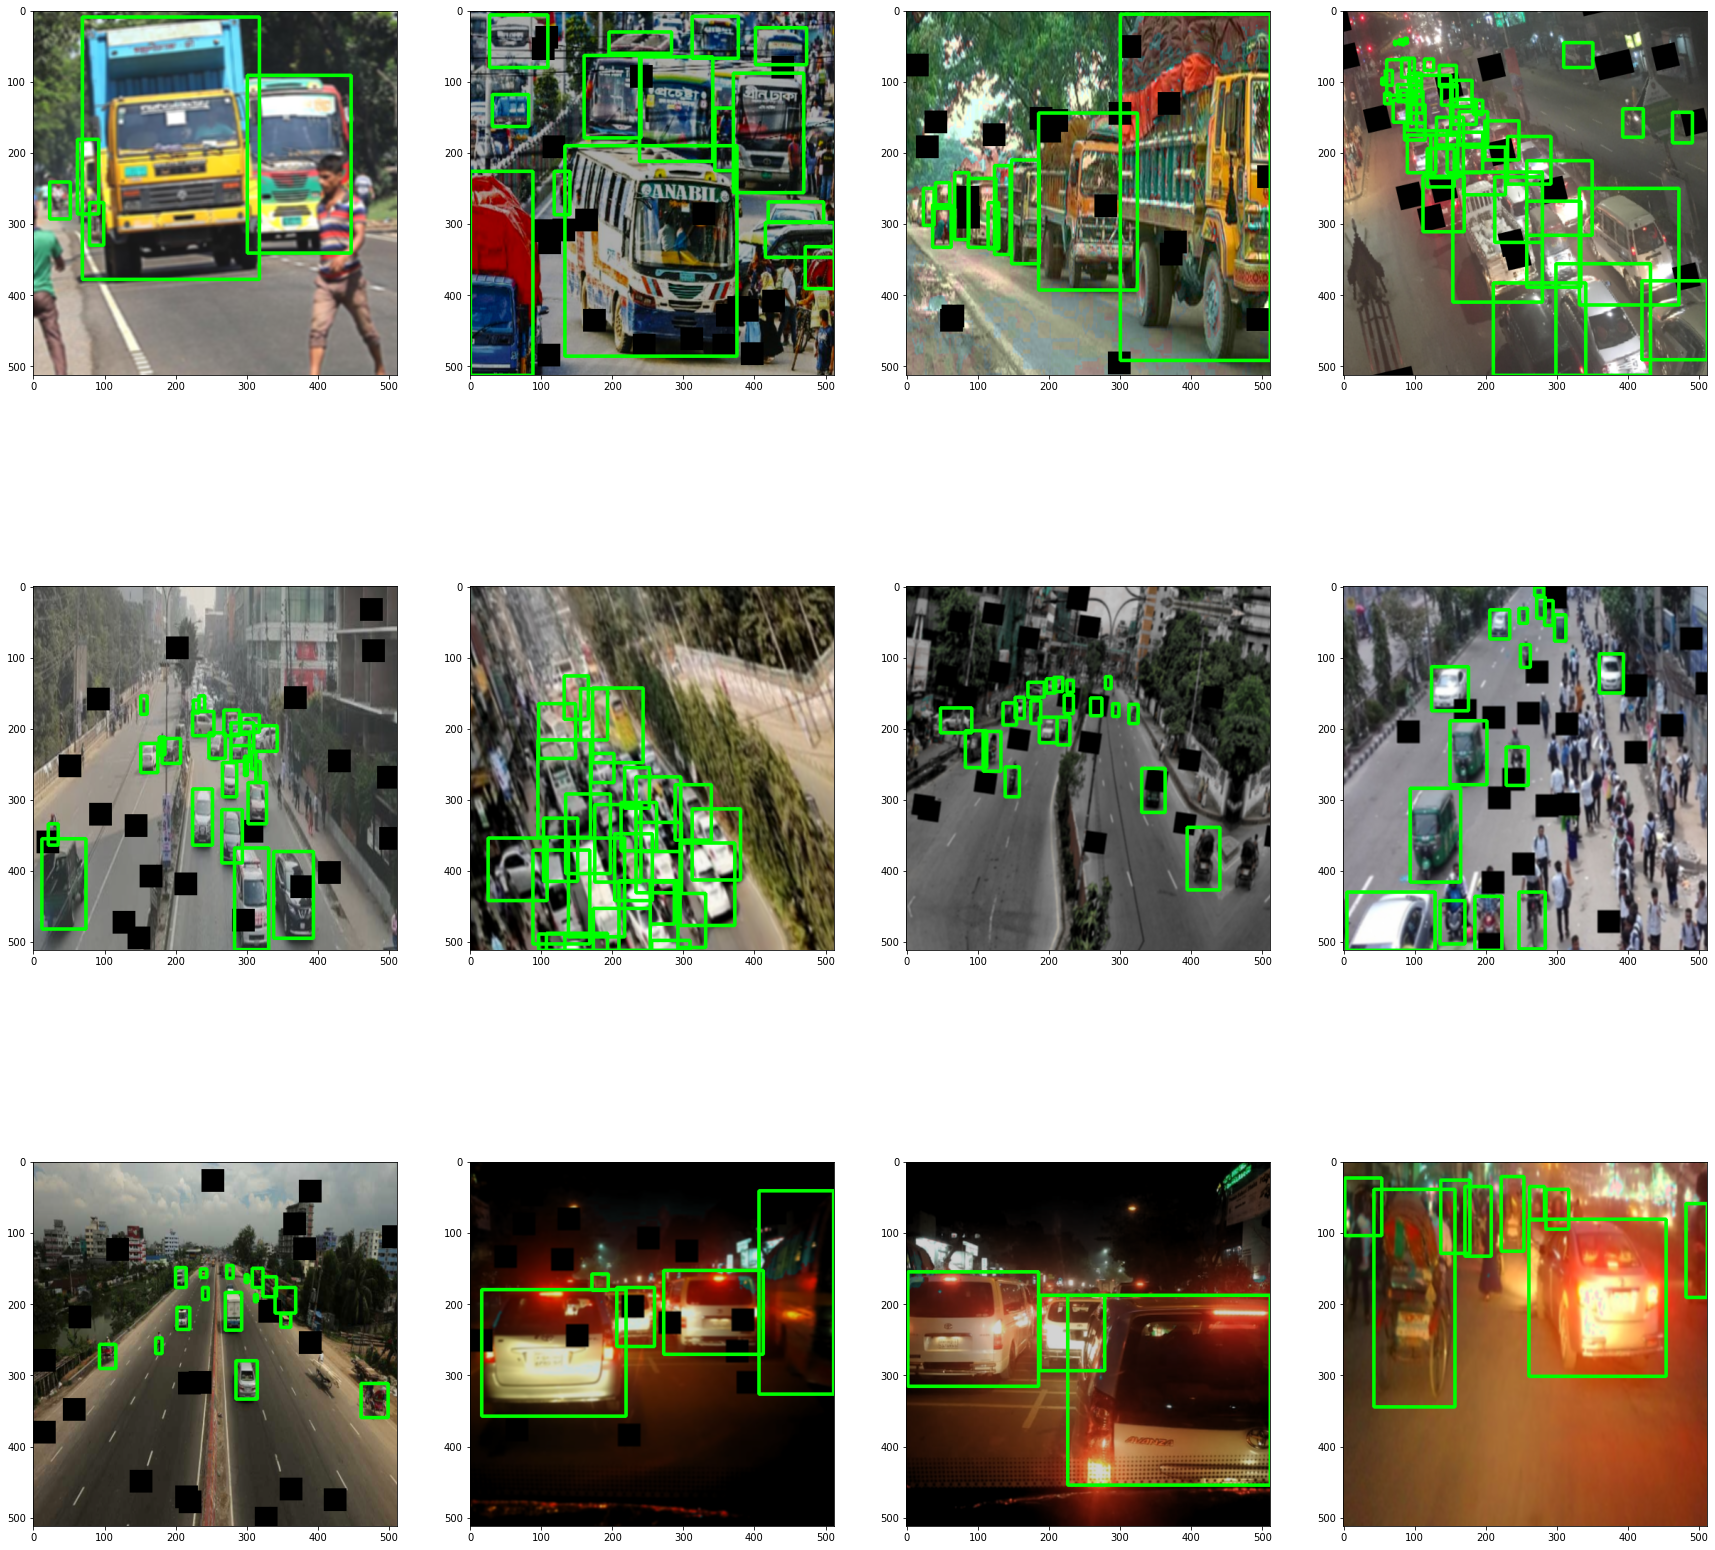

In [ ]:
TRAIN_ROOT_PATH = '/content/drive/My Drive/Dhaka-AI 2020/dataset/train/'
IMG_SIZE = 512

#     def load_cutmix_image_and_boxes(self, index, imsize=1024):
#         """ 
#         This implementation of cutmix author:  https://www.kaggle.com/nvnnghia 
#         Refactoring and adaptation: https://www.kaggle.com/shonenkov
#         """
#         w, h = imsize, imsize
#         s = imsize // 2
    
#         xc, yc = [int(random.uniform(imsize * 0.25, imsize * 0.75)) for _ in range(2)]  # center x, y
#         indexes = [index] + [random.randint(0, self.image_ids.shape[0] - 1) for _ in range(3)]

#         result_image = np.full((imsize, imsize, 3), 1, dtype=np.float32)
#         result_boxes = []

#         for i, index in enumerate(indexes):
#             image, boxes = self.load_image_and_boxes(index)
#             if i == 0:
#                 x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
#                 x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
#             elif i == 1:  # top right
#                 x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
#                 x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
#             elif i == 2:  # bottom left
#                 x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
#                 x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
#             elif i == 3:  # bottom right
#                 x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
#                 x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)
#             result_image[y1a:y2a, x1a:x2a] = image[y1b:y2b, x1b:x2b]
#             padw = x1a - x1b
#             padh = y1a - y1b

#             boxes[:, 0] += padw
#             boxes[:, 1] += padh
#             boxes[:, 2] += padw
#             boxes[:, 3] += padh

#             result_boxes.append(boxes)

#         result_boxes = np.concatenate(result_boxes, 0)
#         np.clip(result_boxes[:, 0:], 0, 2 * s, out=result_boxes[:, 0:])
#         result_boxes = result_boxes.astype(np.int32)
#         result_boxes = result_boxes[np.where((result_boxes[:,2]-result_boxes[:,0])*(result_boxes[:,3]-result_boxes[:,1]) > 0)]
#         return result_image, result_boxes
fold_number = 0

train_dataset = DatasetRetriever(
    image_ids=df_folds[df_folds['fold'] != fold_number].index.values,
    marking=df,
    transforms=get_train_transforms(),
    test=False,
)

validation_dataset = DatasetRetriever(
    image_ids=df_folds[df_folds['fold'] == fold_number].index.values,
    marking=df,
    transforms=get_valid_transforms(),
    test=True,
)
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = 3

c_map = dict(zip(list(range(1,21)),pd.read_csv('class.csv')['classname'].unique()))

for i in range(1, columns*rows +1):
    image, target, image_id = train_dataset[i]
    boxes = target['boxes'].cpu().numpy().astype(np.int32)
    classnames = target['labels'].cpu().numpy()
    numpy_image = image.permute(1,2,0).cpu().numpy()
    for j, box in enumerate(boxes):
        cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 255, 0), 3)
        # cv2.putText(numpy_image , c_map[classnames[j]] , (int(box[0]),int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    fig.add_subplot(rows, columns, i)
    plt.imshow(numpy_image)
plt.show()

In [ ]:
#!pip install --no-deps '../input/timm-package/timm-0.1.26-py3-none-any.whl'
#!pip install --no-deps '../input/pycocotools/pycocotools-2.0-cp37-cp37m-linux_x86_64.whl'

In [ ]:
import sys
sys.path.insert(0, "../input/timm-efficientdet-pytorch")
sys.path.insert(0, "../input/omegaconf")

import json
import numpy as np
import pandas as pd
import cv2
import os
import re
from datetime import datetime
import time
import random

from PIL import Image
from tqdm import tqdm
from glob import glob
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from sklearn.model_selection import StratifiedKFold


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install effdet==0.1.6

     |████████████████████████████████| 61kB 2.8MB/s 
  Found existing installation: effdet 0.2.1
    Uninstalling effdet-0.2.1:
      Successfully uninstalled effdet-0.2.1


In [ ]:
!pip install omegaconf

In [ ]:
CHECKPOINT_PATH = '/content/drive/My Drive/Dhaka-AI 2020/Code/Effdet_checkpoints/effdet'+str(effdet_no)

In [ ]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


class TrainGlobalConfig:
    num_workers = 2
    batch_size = 4
    n_epochs = 25
    lr = 0.0002

    folder = CHECKPOINT_PATH
    verbose = True
    verbose_step = 1
    step_scheduler = False  # do scheduler.step after optimizer.step
    validation_scheduler = True  # do scheduler.step after validation stage loss
    
    SchedulerClass = torch.optim.lr_scheduler.ReduceLROnPlateau
    scheduler_params = dict(
        mode='min',
        factor=0.5,
        patience=1,
        verbose=False, 
        threshold=0.0001,
        threshold_mode='abs',
        cooldown=0, 
        min_lr=1e-8,
        eps=1e-08
    )
class Fitter:
    
    def __init__(self, model, device, config):
        self.config = config
        self.epoch = 0

        self.base_dir = f'{config.folder}'
        if not os.path.exists(self.base_dir):
            os.makedirs(self.base_dir)
        
        self.log_path = f'{self.base_dir}/log.txt'
        self.best_summary_loss = 10**5

        self.model = model
        self.device = device

        param_optimizer = list(self.model.named_parameters())
        no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
            {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ] 

        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=config.lr)
        self.scheduler = config.SchedulerClass(self.optimizer, **config.scheduler_params)
        self.log(f'Fitter prepared. Device is {self.device}')
        ###COMMENT BELOW LINE IF STARTING FROM SCRATCH###
        self.load(CHECKPOINT_PATH + '/last-checkpoint.bin')

    def fit(self, train_loader, validation_loader):
        for e in range(self.config.n_epochs):
            if self.config.verbose:
                lr = self.optimizer.param_groups[0]['lr']
                timestamp = datetime.utcnow().isoformat()
                self.log(f'LR: {lr}')

            t = time.time()
            summary_loss = self.train_one_epoch(train_loader)

            self.log(f'[RESULT]: Train. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            self.save(f'{self.base_dir}/last-checkpoint.bin')

            t = time.time()
            summary_loss = self.validation(validation_loader)

            self.log(f'[RESULT]: Val. Epoch: {self.epoch}, summary_loss: {summary_loss.avg:.5f}, time: {(time.time() - t):.5f}')
            if summary_loss.avg < self.best_summary_loss:
                self.best_summary_loss = summary_loss.avg
                self.model.eval()
                self.save(f'{self.base_dir}/best-checkpoint-{str(self.epoch).zfill(3)}epoch.bin')
                for path in sorted(glob(f'{self.base_dir}/best-checkpoint-*epoch.bin'))[:-3]:
                    os.remove(path)

            if self.config.validation_scheduler:
                self.scheduler.step(metrics=summary_loss.avg)

            self.epoch += 1

    def validation(self, val_loader):
        self.model.eval()
        summary_loss = AverageMeter()
        
        tk0 =  tqdm(enumerate(val_loader),total = len(validation_dataset)/TrainGlobalConfig.batch_size)
        for step, (images, targets, image_ids) in tk0:
            if self.config.verbose:
                if step % self.config.verbose_step == 0:
                    tk0.set_postfix( loss = summary_loss.avg)
                    
            with torch.no_grad():
                pred_res = {}
                images = torch.stack(images)
                batch_size = images.shape[0]
                images = images.to(self.device).float()
                boxes = [target['boxes'].to(self.device).float() for target in targets]
                labels = [target['labels'].to(self.device).float() for target in targets]
                img_scale = torch.tensor([target['img_scale'].to(self.device) for target in targets])
                img_size = torch.tensor([(IMG_SIZE, IMG_SIZE) for target in targets]).to(self.device).float()
                
                pred_res['bbox'] = boxes
                pred_res['cls'] = labels
                pred_res['img_scale'] = img_scale
                pred_res['img_size'] = img_size

                outputs = self.model(images, pred_res)
                loss = outputs['loss']
                summary_loss.update(loss.detach().item(), batch_size)

        return summary_loss

    def train_one_epoch(self, train_loader):
        self.model.train()
        summary_loss = AverageMeter()
        
        tk0 =  tqdm(enumerate(train_loader),total = int(len(train_dataset)/TrainGlobalConfig.batch_size))
        for step, (images, targets, image_ids) in tk0:
            if self.config.verbose:
              if step % self.config.verbose_step == 0:
                  tk0.set_postfix( loss = summary_loss.avg)
            target_train = {}
            images = torch.stack(images)
            images = images.to(self.device).float()
            batch_size = images.shape[0]
            boxes = [target['boxes'].to(self.device).float() for target in targets]
            labels = [target['labels'].to(self.device).float() for target in targets]
            img_scale = torch.tensor([target['img_scale'].to(self.device) for target in targets])
            img_size = torch.tensor([(IMG_SIZE, IMG_SIZE) for target in targets]).to(self.device).float()
            
            target_train['bbox'] = boxes
            target_train['cls'] = labels
            target_train['img_scale'] = img_scale
            target_train['img_size'] = img_size

            self.optimizer.zero_grad()
            
            outputs = self.model(images, target_train)
            loss = outputs['loss']
            
            loss.backward()

            summary_loss.update(loss.detach().item(), batch_size)

            self.optimizer.step()

            if self.config.step_scheduler:
                self.scheduler.step()
        return summary_loss

    
    def save(self, path):
        self.model.eval()
        torch.save({
            'model_state_dict': self.model.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'best_summary_loss': self.best_summary_loss,
            'epoch': self.epoch,
        }, path)

    def load(self, path):
        checkpoint = torch.load(path)
        self.model.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        self.best_summary_loss = checkpoint['best_summary_loss']
        self.epoch = checkpoint['epoch'] + 1
        
    def log(self, message):
        if self.config.verbose:
            print(message)
        with open(self.log_path, 'a+') as logger:
            logger.write(f'{message}\n')
def collate_fn(batch):
    return tuple(zip(*batch))

def run_training():
    device = torch.device('cuda:0')
    net.to(device)

    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=TrainGlobalConfig.batch_size,
#         sampler=RandomSampler(train_dataset),
        shuffle=True,
        pin_memory=False,
        drop_last=True,
        num_workers=TrainGlobalConfig.num_workers,
        collate_fn=collate_fn,
    )
    val_loader = torch.utils.data.DataLoader(
        validation_dataset, 
        batch_size=TrainGlobalConfig.batch_size,
        num_workers=TrainGlobalConfig.num_workers,
        shuffle=False,
#         sampler=SequentialSampler(validation_dataset),
        pin_memory=False,
        collate_fn=collate_fn,
    )

    fitter = Fitter(model=net, device=device, config=TrainGlobalConfig)
    print("\n Fitter epoch no : " ,fitter.epoch)
    fitter.fit(train_loader, val_loader)
    print("\n Fitter epoch no : " ,fitter.epoch)
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet

def get_net():
    config = get_efficientdet_config('tf_efficientdet_d' + str(effdet_no))
    net = EfficientDet(config, pretrained_backbone=True)
    print(config.num_classes)
    config.num_classes = 21
    config.image_size = 512
    net.class_net = HeadNet(config, num_outputs=config.num_classes, norm_kwargs=dict(eps=.001, momentum=.01))
    return DetBenchTrain(net, config)

net = get_net()
run_training()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ra-9a3e5369.pth" to /root/.cache/torch/checkpoints/tf_efficientnet_b5_ra-9a3e5369.pth


90
Fitter prepared. Device is cuda:0

 Fitter epoch no :  15
LR: 0.0002


 21%|██        | 125/600 [04:49<15:07,  1.91s/it, loss=0.681]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 62%|██████▏   | 372/600 [14:25<07:15,  1.91s/it, loss=0.681]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [22:50<00:00,  2.28s/it, loss=0.684]


[RESULT]: Train. Epoch: 15, summary_loss: 0.68433, time: 1370.87735


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [04:43<00:00,  1.89s/it, loss=0.646]


[RESULT]: Val. Epoch: 15, summary_loss: 0.64506, time: 283.80702
LR: 0.0002


  6%|▋         | 39/600 [01:14<15:30,  1.66s/it, loss=0.662]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 38%|███▊      | 226/600 [06:53<10:01,  1.61s/it, loss=0.674]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [18:14<00:00,  1.82s/it, loss=0.656]


[RESULT]: Train. Epoch: 16, summary_loss: 0.65626, time: 1094.36954


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:29<00:00,  1.40s/it, loss=0.625]


[RESULT]: Val. Epoch: 16, summary_loss: 0.62444, time: 209.93700
LR: 0.0002


 57%|█████▋    | 340/600 [09:56<06:20,  1.46s/it, loss=0.635]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 78%|███████▊  | 465/600 [13:36<03:20,  1.49s/it, loss=0.637]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:24<00:00,  1.74s/it, loss=0.641]


[RESULT]: Train. Epoch: 17, summary_loss: 0.64085, time: 1044.78617


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:18<00:00,  1.32s/it, loss=0.622]


[RESULT]: Val. Epoch: 17, summary_loss: 0.62158, time: 198.67738
LR: 0.0002


 19%|█▉        | 116/600 [03:23<12:06,  1.50s/it, loss=0.616]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 63%|██████▎   | 377/600 [10:52<05:49,  1.57s/it, loss=0.631]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:20<00:00,  1.73s/it, loss=0.625]


[RESULT]: Train. Epoch: 18, summary_loss: 0.62480, time: 1040.95625


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:15<00:00,  1.30s/it, loss=0.606]


[RESULT]: Val. Epoch: 18, summary_loss: 0.60552, time: 195.32193
LR: 0.0002


 77%|███████▋  | 462/600 [13:07<03:37,  1.58s/it, loss=0.604]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 97%|█████████▋| 581/600 [16:34<00:29,  1.54s/it, loss=0.605]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:05<00:00,  1.71s/it, loss=0.605]


[RESULT]: Train. Epoch: 19, summary_loss: 0.60474, time: 1025.46523


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:16<00:00,  1.31s/it, loss=0.594]


[RESULT]: Val. Epoch: 19, summary_loss: 0.59344, time: 196.88008
LR: 0.0002


 28%|██▊       | 169/600 [05:07<11:26,  1.59s/it, loss=0.579]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 81%|████████  | 486/600 [14:26<03:02,  1.60s/it, loss=0.589]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:50<00:00,  1.78s/it, loss=0.597]


[RESULT]: Train. Epoch: 20, summary_loss: 0.59644, time: 1070.62673


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:17<00:00,  1.32s/it, loss=0.59]


[RESULT]: Val. Epoch: 20, summary_loss: 0.59012, time: 197.62938
LR: 0.0002


 14%|█▍        | 87/600 [02:37<17:14,  2.02s/it, loss=0.575]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 17%|█▋        | 104/600 [03:07<12:21,  1.50s/it, loss=0.578]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:42<00:00,  1.77s/it, loss=0.578]


[RESULT]: Train. Epoch: 21, summary_loss: 0.57766, time: 1062.11665


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:37<00:00,  1.45s/it, loss=0.584]


[RESULT]: Val. Epoch: 21, summary_loss: 0.58321, time: 217.76790
LR: 0.0002


 26%|██▌       | 154/600 [04:50<13:24,  1.80s/it, loss=0.57]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 32%|███▏      | 193/600 [06:03<12:33,  1.85s/it, loss=0.567]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [18:34<00:00,  1.86s/it, loss=0.564]


[RESULT]: Train. Epoch: 22, summary_loss: 0.56384, time: 1114.23231


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:30<00:00,  1.40s/it, loss=0.564]


[RESULT]: Val. Epoch: 22, summary_loss: 0.56337, time: 210.52861
LR: 0.0002


 41%|████      | 245/600 [07:30<10:58,  1.86s/it, loss=0.551]


ERROR IN THIS IMAGE :  118


 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]

 68%|██████▊   | 407/600 [12:23<05:12,  1.62s/it, loss=0.549]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [18:22<00:00,  1.84s/it, loss=0.55]


[RESULT]: Train. Epoch: 23, summary_loss: 0.54986, time: 1102.70901


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:40<00:00,  1.47s/it, loss=0.57]

[RESULT]: Val. Epoch: 23, summary_loss: 0.57004, time: 220.57564
LR: 0.0002



 41%|████      | 244/600 [07:38<10:09,  1.71s/it, loss=0.537]


ERROR IN THIS IMAGE :  118



 41%|████      | 245/600 [07:39<11:38,  1.97s/it, loss=0.537]

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 47%|████▋     | 283/600 [08:51<10:05,  1.91s/it, loss=0.539]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [18:39<00:00,  1.87s/it, loss=0.54]


[RESULT]: Train. Epoch: 24, summary_loss: 0.53967, time: 1119.48340


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:29<00:00,  1.40s/it, loss=0.566]

[RESULT]: Val. Epoch: 24, summary_loss: 0.56561, time: 209.35596
LR: 0.0001



 76%|███████▌  | 457/600 [14:07<04:10,  1.75s/it, loss=0.497]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 96%|█████████▌| 574/600 [17:48<00:45,  1.76s/it, loss=0.495]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [18:36<00:00,  1.86s/it, loss=0.495]


[RESULT]: Train. Epoch: 25, summary_loss: 0.49603, time: 1116.82026


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:45<00:00,  1.50s/it, loss=0.534]


[RESULT]: Val. Epoch: 25, summary_loss: 0.53331, time: 225.30931
LR: 0.0001


 24%|██▎       | 141/600 [04:23<12:49,  1.68s/it, loss=0.47]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 65%|██████▌   | 391/600 [12:26<05:58,  1.71s/it, loss=0.477]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [19:05<00:00,  1.91s/it, loss=0.476]


[RESULT]: Train. Epoch: 26, summary_loss: 0.47588, time: 1145.89825


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:36<00:00,  1.44s/it, loss=0.524]


[RESULT]: Val. Epoch: 26, summary_loss: 0.52362, time: 216.46252
LR: 0.0001


 26%|██▋       | 158/600 [04:50<14:49,  2.01s/it, loss=0.448]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 63%|██████▎   | 380/600 [11:23<07:01,  1.91s/it, loss=0.464]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [18:02<00:00,  1.80s/it, loss=0.462]


[RESULT]: Train. Epoch: 27, summary_loss: 0.46194, time: 1082.25509


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:21<00:00,  1.35s/it, loss=0.524]

[RESULT]: Val. Epoch: 27, summary_loss: 0.52391, time: 202.03113
LR: 0.0001



  8%|▊         | 51/600 [01:33<18:49,  2.06s/it, loss=0.475]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 61%|██████    | 365/600 [10:47<07:43,  1.97s/it, loss=0.453]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:40<00:00,  1.77s/it, loss=0.458]


[RESULT]: Train. Epoch: 28, summary_loss: 0.45824, time: 1060.22799


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:21<00:00,  1.34s/it, loss=0.528]

[RESULT]: Val. Epoch: 28, summary_loss: 0.52802, time: 201.55862
LR: 5e-05



 16%|█▌        | 95/600 [02:45<13:10,  1.57s/it, loss=0.43]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 41%|████      | 247/600 [07:07<12:25,  2.11s/it, loss=0.432]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:24<00:00,  1.74s/it, loss=0.427]


[RESULT]: Train. Epoch: 29, summary_loss: 0.42690, time: 1044.60219


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:23<00:00,  1.36s/it, loss=0.507]


[RESULT]: Val. Epoch: 29, summary_loss: 0.50637, time: 203.35567
LR: 5e-05


 78%|███████▊  | 471/600 [13:52<03:26,  1.60s/it, loss=0.423]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 88%|████████▊ | 531/600 [15:40<01:59,  1.73s/it, loss=0.42]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:41<00:00,  1.77s/it, loss=0.42]


[RESULT]: Train. Epoch: 30, summary_loss: 0.42012, time: 1061.32555


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:17<00:00,  1.32s/it, loss=0.503]


[RESULT]: Val. Epoch: 30, summary_loss: 0.50329, time: 197.57297
LR: 5e-05


 23%|██▎       | 140/600 [04:03<12:29,  1.63s/it, loss=0.406]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 61%|██████    | 367/600 [10:34<06:07,  1.58s/it, loss=0.407]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:08<00:00,  1.71s/it, loss=0.412]


[RESULT]: Train. Epoch: 31, summary_loss: 0.41241, time: 1028.89928


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:10<00:00,  1.27s/it, loss=0.502]


[RESULT]: Val. Epoch: 31, summary_loss: 0.50118, time: 190.73302
LR: 5e-05


  0%|          | 0/600 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 60%|█████▉    | 358/600 [10:17<07:05,  1.76s/it, loss=0.398]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:06<00:00,  1.71s/it, loss=0.398]


[RESULT]: Train. Epoch: 32, summary_loss: 0.39807, time: 1026.91126


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:13<00:00,  1.29s/it, loss=0.512]

[RESULT]: Val. Epoch: 32, summary_loss: 0.51175, time: 193.80122
LR: 5e-05



  7%|▋         | 40/600 [01:10<15:48,  1.69s/it, loss=0.395]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 32%|███▏      | 192/600 [05:28<11:13,  1.65s/it, loss=0.395]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:02<00:00,  1.70s/it, loss=0.402]


[RESULT]: Train. Epoch: 33, summary_loss: 0.40246, time: 1022.11438


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:10<00:00,  1.27s/it, loss=0.507]

[RESULT]: Val. Epoch: 33, summary_loss: 0.50701, time: 190.24212
LR: 2.5e-05



 65%|██████▍   | 389/600 [10:59<05:54,  1.68s/it, loss=0.39] 


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 79%|███████▉  | 475/600 [13:21<03:09,  1.51s/it, loss=0.388]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [16:51<00:00,  1.69s/it, loss=0.388]


[RESULT]: Train. Epoch: 34, summary_loss: 0.38764, time: 1011.79358


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:16<00:00,  1.31s/it, loss=0.502]

[RESULT]: Val. Epoch: 34, summary_loss: 0.50160, time: 197.08002
LR: 2.5e-05



 32%|███▏      | 191/600 [05:27<11:16,  1.65s/it, loss=0.389]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 52%|█████▏    | 314/600 [09:00<06:54,  1.45s/it, loss=0.388]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:27<00:00,  1.75s/it, loss=0.385]


[RESULT]: Train. Epoch: 35, summary_loss: 0.38528, time: 1048.01578


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:12<00:00,  1.28s/it, loss=0.504]

[RESULT]: Val. Epoch: 35, summary_loss: 0.50382, time: 192.55740
LR: 1.25e-05



  3%|▎         | 16/600 [00:28<14:25,  1.48s/it, loss=0.406]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 10%|█         | 60/600 [01:48<16:07,  1.79s/it, loss=0.396]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:05<00:00,  1.71s/it, loss=0.381]


[RESULT]: Train. Epoch: 36, summary_loss: 0.38077, time: 1025.89067


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:16<00:00,  1.31s/it, loss=0.499]


[RESULT]: Val. Epoch: 36, summary_loss: 0.49900, time: 196.21492
LR: 1.25e-05


  8%|▊         | 49/600 [01:29<15:56,  1.74s/it, loss=0.353]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 83%|████████▎ | 500/600 [14:29<02:33,  1.54s/it, loss=0.376]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:20<00:00,  1.73s/it, loss=0.375]


[RESULT]: Train. Epoch: 37, summary_loss: 0.37506, time: 1040.87217


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:16<00:00,  1.31s/it, loss=0.498]


[RESULT]: Val. Epoch: 37, summary_loss: 0.49803, time: 196.86977
LR: 1.25e-05


 15%|█▌        | 90/600 [02:37<13:33,  1.59s/it, loss=0.375]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


 67%|██████▋   | 400/600 [11:29<05:05,  1.53s/it, loss=0.376]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


100%|██████████| 600/600 [17:20<00:00,  1.73s/it, loss=0.374]


[RESULT]: Train. Epoch: 38, summary_loss: 0.37454, time: 1040.58481


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:14<00:00,  1.30s/it, loss=0.5]

[RESULT]: Val. Epoch: 38, summary_loss: 0.50037, time: 194.68564
LR: 1.25e-05



  6%|▌         | 35/600 [01:05<18:07,  1.92s/it, loss=0.382]


ERROR IN THIS IMAGE :  114

 [[230. 517. 330. 677.]
 [526. 533. 586. 652.]
 [  1. 525. 167. 663.]
 [179. 509. 311. 575.]
 [492. 505. 561. 543.]
 [558. 522. 582. 543.]
 [ 95. 531. 191. 581.]
 [478. 533. 548. 605.]]


 70%|██████▉   | 418/600 [12:17<04:48,  1.58s/it, loss=0.373]


ERROR IN THIS IMAGE :  118

 [[397. 458. 720. 697.]
 [133. 477. 236. 709.]
 [186. 477. 248. 640.]
 [116. 483. 164. 592.]
 [217. 403. 408. 608.]]


100%|██████████| 600/600 [17:38<00:00,  1.76s/it, loss=0.371]


[RESULT]: Train. Epoch: 39, summary_loss: 0.37162, time: 1058.11934


  0%|          | 0/150.0 [00:00<?, ?it/s]


ERROR IN THIS IMAGE :  113

 [[125. 478. 332. 728.]
 [536. 509. 717. 755.]
 [386. 499. 654. 655.]
 [308. 496. 451. 611.]
 [  1. 483.  53. 775.]
 [ 44. 496. 136. 614.]
 [ 80. 506. 158. 662.]
 [383. 406. 488. 492.]
 [178. 411. 372. 484.]
 [ 50. 437. 144. 480.]
 [142. 437. 192. 481.]
 [105. 414. 169. 461.]
 [447. 468. 588. 522.]]


100%|██████████| 150/150.0 [03:25<00:00,  1.37s/it, loss=0.504]

[RESULT]: Val. Epoch: 39, summary_loss: 0.50339, time: 205.69129

 Fitter epoch no :  40
